In [1]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\tishya\DATASETS\BMI\bmi.csv")

In [3]:
df.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [4]:
df = df.iloc[:,:3]
df.head()

,Age,Height,Weight
0,61,1.85,109.30
1,60,1.71,79.02
2,60,1.55,74.70
3,60,1.46,35.90
4,60,1.58,97.10


In [5]:
x = df.iloc[:,:2]
y = df.iloc[:,2:]

<Axes: xlabel='Age', ylabel='Weight'>

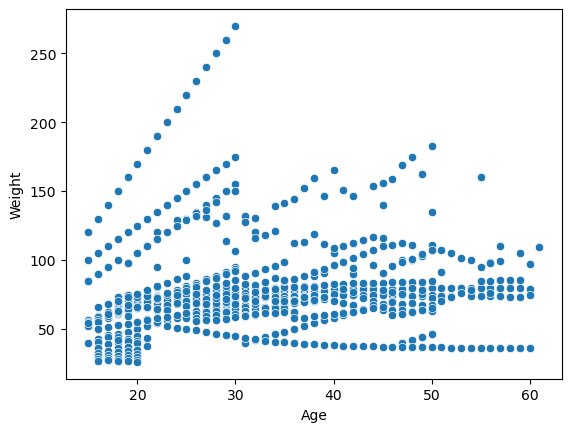

In [6]:
sns.scatterplot(df , x='Age' , y='Weight')

In [7]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = .2)

In [8]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [9]:
model.score(test_x,test_y)

0.4697446724977813

In [11]:
data = df

In [12]:
# another model
data.head()

,Age,Height,Weight
0,61,1.85,109.30
1,60,1.71,79.02
2,60,1.55,74.70
3,60,1.46,35.90
4,60,1.58,97.10


In [13]:
data = pd.get_dummies(data , drop_first=True)


In [14]:
data.head()

,Age,Height,Weight
0,61,1.85,109.30
1,60,1.71,79.02
2,60,1.55,74.70
3,60,1.46,35.90
4,60,1.58,97.10


In [15]:
data.columns

Index(['Age', 'Height', 'Weight'], dtype='object')

In [16]:
x = data[['Age', 'Height']]
y = data['Weight']

In [17]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = .2)

In [18]:
model2 = LinearRegression()
model2.fit(train_x,train_y)

LinearRegression()

In [19]:
model2.score(train_x,train_y)

0.3745531887900049

In [20]:
model2.score(test_x,test_y)

0.3880982802020424

In [21]:
df.head()

,Age,Height,Weight
0,61,1.85,109.30
1,60,1.71,79.02
2,60,1.55,74.70
3,60,1.46,35.90
4,60,1.58,97.10


# new model

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score , classification_report

In [23]:
data = pd.read_csv(r"C:\Users\tishya\DATASETS\BMI\bmi.csv")

In [24]:
data.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [26]:
data.isna().sum()

Age         0
Height      0
Weight      0
Bmi         0
BmiClass    0
dtype: int64

we're aiming to preict the BMI class through other attributes of the data.

In [27]:
data = pd.get_dummies(data,drop_first=True)

In [28]:
data.head()

,Age,Height,Weight,Bmi,BmiClass_Obese Class 1,BmiClass_Obese Class 2,BmiClass_Obese Class 3,BmiClass_Overweight,BmiClass_Underweight
0,61,1.85,109.30,31.935720,True,False,False,False,False
1,60,1.71,79.02,27.023700,False,False,False,True,False
2,60,1.55,74.70,31.092612,True,False,False,False,False
3,60,1.46,35.90,16.841809,False,False,False,False,True
4,60,1.58,97.10,38.896010,False,True,False,False,False


In [73]:
x = data.iloc[:,:4]
y = data.iloc[:,4:]

In [30]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = .3)

In [31]:
# Creating  a model
multivar_logistic_model = OneVsRestClassifier(LogisticRegression())

In [32]:
# training the model
multivar_logistic_model.fit(train_x,train_y)

OneVsRestClassifier(estimator=LogisticRegression())

In [33]:
predicted_y = multivar_logistic_model.predict(test_x)

In [34]:
accuracy_score(test_y,predicted_y)

0.6681614349775785

In [35]:
multivar_logistic_model.score(test_x,test_y)

0.6681614349775785

# predicting Height,Weight using other vars

In [47]:
from sklearn.linear_model import LinearRegression

In [69]:
data.head()

,Age,Height,Weight,Bmi,BmiClass_Obese Class 1,BmiClass_Obese Class 2,BmiClass_Obese Class 3,BmiClass_Overweight,BmiClass_Underweight
0,61,1.85,109.30,31.935720,True,False,False,False,False
1,60,1.71,79.02,27.023700,False,False,False,True,False
2,60,1.55,74.70,31.092612,True,False,False,False,False
3,60,1.46,35.90,16.841809,False,False,False,False,True
4,60,1.58,97.10,38.896010,False,True,False,False,False


In [43]:
x = data.iloc[:,1:3]
y = pd.concat((data.iloc[:,0],data.iloc[:,3:]),axis=1)


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [48]:
predict_HW_model = LinearRegression()

In [49]:
predict_HW_model.fit(x_train,y_train)

LinearRegression()

In [51]:
predicted_y = predict_HW_model.predict(x_test)

In [54]:
predict_HW_model.score(x_test,y_test)

0.31321970117097625

In [ ]:
# new model

In [90]:
age = data.iloc[:,0]
bmi = data.iloc[:,3]
x2 = pd.concat((age,bmi),axis=1)
y2 = data.iloc[:,1:3]

In [96]:
x2.head()

,Age,Bmi
0,61,31.935720
1,60,27.023700
2,60,31.092612
3,60,16.841809
4,60,38.896010


In [95]:
y2.head()

,Height,Weight
0,1.85,109.30
1,1.71,79.02
2,1.55,74.70
3,1.46,35.90
4,1.58,97.10


In [91]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.2)

In [98]:
new_model = LinearRegression()
new_model.fit(x2,y2)

LinearRegression()

In [99]:
new_model.score(x2_test,y2_test)

0.6066092818702551

#conclusion : obese class is irrelavant to predict weight and height 

# predicting BMI using weight and height

In [100]:
data.head()

,Age,Height,Weight,Bmi,BmiClass_Obese Class 1,BmiClass_Obese Class 2,BmiClass_Obese Class 3,BmiClass_Overweight,BmiClass_Underweight
0,61,1.85,109.30,31.935720,True,False,False,False,False
1,60,1.71,79.02,27.023700,False,False,False,True,False
2,60,1.55,74.70,31.092612,True,False,False,False,False
3,60,1.46,35.90,16.841809,False,False,False,False,True
4,60,1.58,97.10,38.896010,False,True,False,False,False


In [102]:
x = data.iloc[:,:3]
y = data.iloc[:,3]

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [105]:
bmi_model = LinearRegression()
bmi_model.fit(x_train,y_train)

LinearRegression()

In [106]:
bmi_model.score(x_test,y_test)

0.9530724868906028

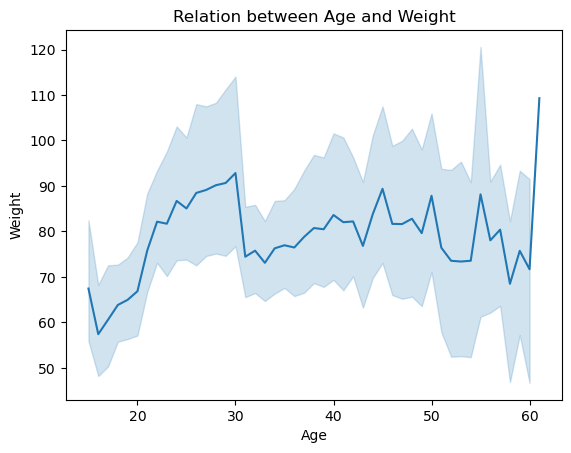

In [112]:
import matplotlib.pyplot as plt

sns.lineplot(x=data['Age'] , y=data['Weight'])
plt.title('Relation between Age and Weight')
plt.show()

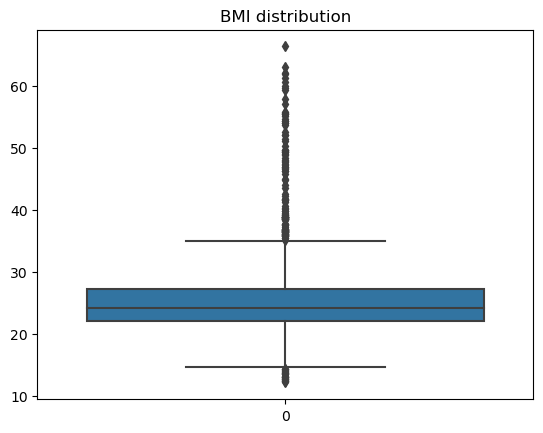

In [119]:
sns.boxplot(data['Bmi'])
plt.title('BMI distribution')
plt.show()

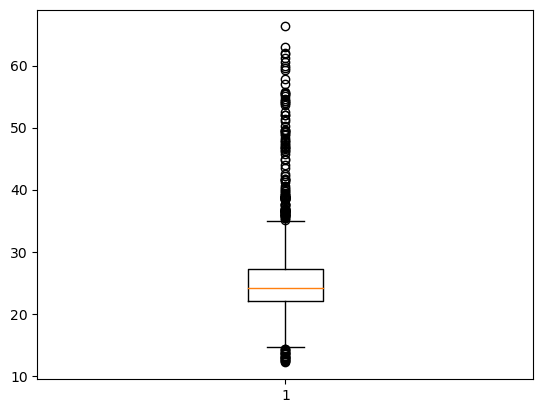

In [116]:
plt.boxplot(data['Bmi'])
plt.show()

In [137]:
# Identifying outliers
import numpy as np

q1 = np.percentile(data['Bmi'],25)
q3 = np.percentile(data['Bmi'],75)

IQR = q3-q1

lb = q1 - 1.5*IQR
ub = q3 + 1.5*IQR

outliers = data['Bmi'][(data['Bmi']<lb) | (data['Bmi']>ub)]
outliers.count()

137

Since there're many outliers , we'll not ignore them